 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [198]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [199]:
# Reading whale returns while correctly formatting dates and setting dates as index
whale_df = pd.read_csv(Path('Resources/whale_returns.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
# Previewing the datafram
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [200]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [201]:
# Drop nulls
whale_df.dropna(inplace=True) 
# Counting nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [202]:
# Reading algorithmic returns
algo_daily_df = pd.read_csv(Path('Resources/algo_returns.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
# Previewing dataframe
algo_daily_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [203]:
# Count nulls
algo_daily_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [204]:
# Drop nulls
algo_daily_df.dropna(inplace=True)
# Confirming nulls are dropped
algo_daily_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [205]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv(Path('Resources/sp_tsx_history.csv'),index_col='Date', infer_datetime_format=True, parse_dates=True)
# Previewing dataframe
sp_tsx_df.head(10)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [206]:
# Check Data Types
sp_tsx_df.dtypes


Close    object
dtype: object

In [207]:
# Removing non-numerical characters
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '', regex=True)
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '', regex=True)


In [208]:
# Fixing datatypes
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float').pct_change()
# Previewing dataframe
sp_tsx_df.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


In [209]:
# Drop nulls
sp_tsx_df.dropna(inplace=True)

In [210]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df.rename(columns={'Close':'TSX SP 60'} ,inplace=True)
# Previewing Dataframe
sp_tsx_df.head(10)

,TSX SP 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608
2012-10-15,0.002288


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [211]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

all_three_df = pd.concat([whale_df, algo_daily_df, sp_tsx_df], axis="columns", join='inner')
all_three_df = all_three_df.reset_index()
all_three_df = all_three_df.set_index('Date')
# Previewing DataFrame
all_three_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX SP 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

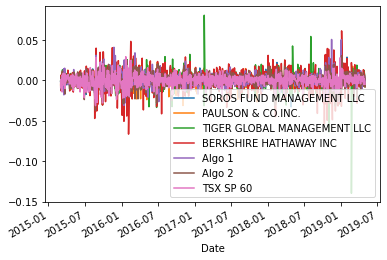

In [212]:
# Plot daily returns of all portfolios
all_three_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

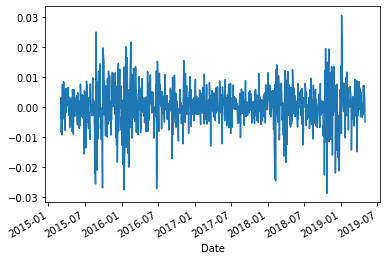

In [213]:
# Calculate cumulative returns of all portfolios
weights1 = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]
cumaltive_returns = all_three_df.dot(weights1)
# Plot cumulative returns
cumaltive_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

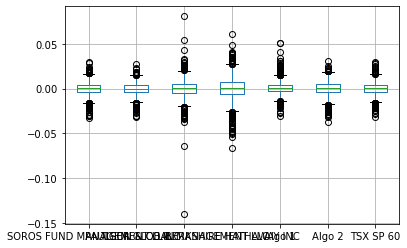

In [214]:
# Box plot to visually show risk
all_three_df.boxplot()

### Calculate Standard Deviations

In [215]:
# Calculate the daily standard deviations of all portfolios
all_three_std = all_three_df.std().sort_values(ascending=False)
print(all_three_std)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
TSX SP 60                      0.007034
PAULSON & CO.INC.              0.006982
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [245]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = sp_tsx_df.std()
print(sp_std)
# Determining which portfolios are riskier than S&P TSX 60
print('\nRiskier?')
all_three_std > all_three_std['TSX SP 60'] 
    

TSX SP 60    0.006637
dtype: float64

Riskier?


BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
Algo 2                          True
SOROS FUND MANAGEMENT LLC       True
Algo 1                          True
TSX SP 60                      False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [217]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_three_std * np.sqrt(252)
# Previewing DataFrame
annualized_std.head(10)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
TSX SP 60                      0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

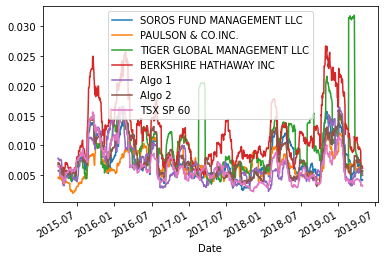

In [218]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
twentyone_rolling_std = all_three_df.rolling(window=21).std() 
# Plot the rolling standard deviation
twentyone_rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

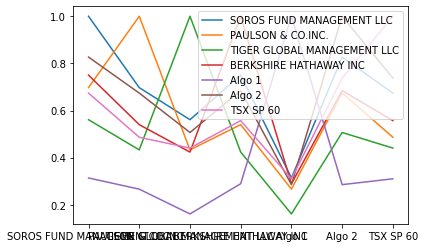

In [219]:
# Calculate the correlation
correlation = all_three_df.corr()
# Display de correlation matrix
correlation.plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Beta: 1.0160439091063613


<AxesSubplot:xlabel='Date'>

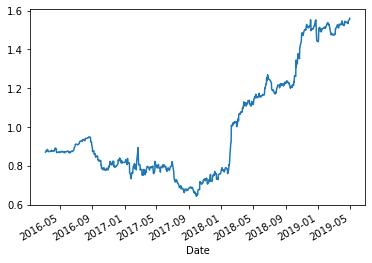

In [247]:
# Calculate covariance of a single portfolio
cov = all_three_df['BERKSHIRE HATHAWAY INC'].cov(all_three_df['TSX SP 60'])
# Calculate variance of S&P TSX
var = all_three_df['TSX SP 60'].var()
# Computing beta
beta = cov/var 
print(f'Beta: {beta}')
# Plot beta trend
rolling_covar = all_three_df['BERKSHIRE HATHAWAY INC'].rolling(window=252).cov(all_three_df['TSX SP 60'])
rolling_var = all_three_df['TSX SP 60'].rolling(window=252).var()
rolling_beta = rolling_covar / rolling_var
rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

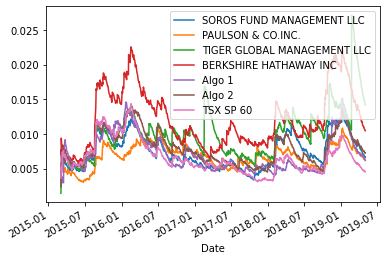

In [254]:
# Use `ewm` to calculate the rolling window
ewm = all_three_df.ewm(halflife=21).std().plot()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [222]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_three_df.mean() * 252) / (all_three_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX SP 60                      0.195550
dtype: float64

<AxesSubplot:>

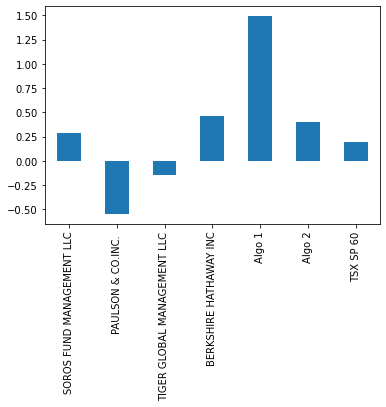

In [223]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic strategy 1 outperform both the market and other portfolios, however the second algorithmic strategy outperforms all but the Berkshire Hathaway Inc. portfolio. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [224]:
# Reading data from 1st stock
otex_df = pd.read_csv(Path('./Resources/otex_historical.csv'), infer_datetime_format=True, parse_dates=True, index_col='Date')
# Renaming column so it is relevant in later DataFrame
otex_df.rename(columns={'Close':'Otex'}, inplace=True)
# Previewing Dataframe
otex_df.head()

,Symbol,Otex
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [225]:
# Reading data from 2nd stock
l_df = pd.read_csv(Path('./Resources/l_historical.csv'), infer_datetime_format=True, parse_dates=True, index_col='Date')
# Renaming column so it is relevant in later DataFrame
l_df.rename(columns={'Close':'L'}, inplace=True)
# Previewing Dataframe
l_df.head()

,Symbol,L
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [226]:
# Reading data from 3rd stock
shop_df =  pd.read_csv(Path('./Resources/shop_historical.csv'), infer_datetime_format=True, parse_dates=True, index_col='Date')
# Renaming column so it is relevant in later DataFrame
shop_df.rename(columns={'Close':'Shop'}, inplace=True)
# Previewing Dataframe
shop_df.head()

,Symbol,Shop
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [227]:
# Combine all stocks in a single DataFrame
my_three_df = pd.concat([shop_df, l_df, otex_df], axis='columns', join='outer')
my_three_df.head()

,Symbol,Shop,Symbol,L,Symbol,Otex
Date,,,,,,
2018-01-02,SHOP,132.06,L,57.99,OTEX,43.58
2018-01-03,SHOP,135.15,L,57.41,OTEX,43.07
2018-01-04,SHOP,137.46,L,57.42,OTEX,42.91
2018-01-05,SHOP,137.26,L,57.42,OTEX,42.57
2018-01-08,SHOP,139.51,L,56.86,OTEX,42.16


In [255]:
# Reset Date index
my_three_df = my_three_df.reset_index()
my_three_df = my_three_df.set_index('Date')

In [229]:
# Reorganize portfolio data by having a column per symbol
my_three_df = my_three_df.drop(['Symbol'], axis=1)

my_three_df.head()

,Shop,L,Otex
Date,,,
2018-01-02,132.06,57.99,43.58
2018-01-03,135.15,57.41,43.07
2018-01-04,137.46,57.42,42.91
2018-01-05,137.26,57.42,42.57
2018-01-08,139.51,56.86,42.16


In [230]:
# Calculate daily returns
my_three_df = my_three_df.pct_change()
# Drop NAs
my_three_df = my_three_df.dropna()
# Display sample data
my_three_df.head()

,Shop,L,Otex
Date,,,
2018-01-03,0.023398,-0.010002,-0.011703
2018-01-04,0.017092,0.000174,-0.003715
2018-01-05,-0.001455,0.000000,-0.007924
2018-01-08,0.016392,-0.009753,-0.009631
2018-01-09,-0.011254,0.008969,-0.000712


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [231]:
# Set weights
weights2 = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_cumaltive_returns = my_three_df.dot(weights2)
# Display sample data
my_cumaltive_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [232]:
# Join your returns DataFrame to the original returns DataFrame
total_df = pd.concat([my_three_df, all_three_df], join= 'inner', axis='columns')
# Previewing Dataframe
total_df.head()

,Shop,L,Otex,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX SP 60
Date,,,,,,,,,,
2018-01-03,0.023398,-0.010002,-0.011703,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.017092,0.000174,-0.003715,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.001455,0.000000,-0.007924,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.016392,-0.009753,-0.009631,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.011254,0.008969,-0.000712,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [233]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_df = total_df.dropna()
# Previewing Dataframe
total_df.head()

,Shop,L,Otex,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX SP 60
Date,,,,,,,,,,
2018-01-03,0.023398,-0.010002,-0.011703,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.017092,0.000174,-0.003715,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.001455,0.000000,-0.007924,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.016392,-0.009753,-0.009631,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.011254,0.008969,-0.000712,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [234]:
# Calculate the annualized `std`
my_annualized_std = total_df.std() * np.sqrt(252)
my_annualized_std


Shop                           0.504079
L                              0.162907
Otex                           0.225703
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
TSX SP 60                      0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

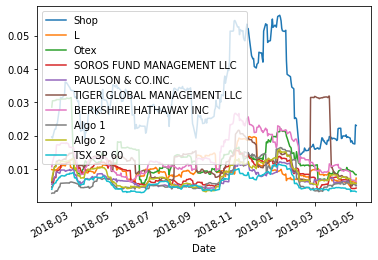

In [235]:
# Calculate rolling standard deviation
my_twentyone_rolling_std = total_df.rolling(window=21).std()
# Plot rolling standard deviation
my_twentyone_rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

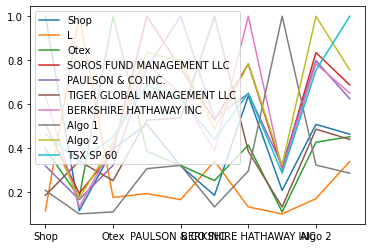

In [236]:
# Calculate and plot the correlation
total_df.corr().plot()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

Beta: 1.0260143082685393


<AxesSubplot:xlabel='Date'>

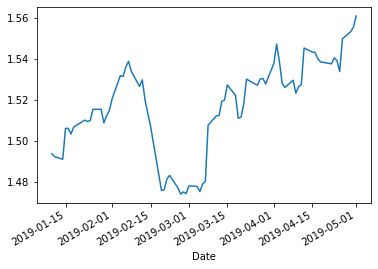

In [256]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
cov2 = total_df['Otex'].cov(total_df['TSX SP 60'])
# Calculate variance of S&P TSX
var2 = total_df['TSX SP 60'].var()
# Computing beta
beta2 = cov2/var2 
print(f'Beta: {beta2}')
# Plot beta trend
rolling_covar2 = total_df['BERKSHIRE HATHAWAY INC'].rolling(window=252).cov(total_df['TSX SP 60'])
rolling_var2 = total_df['TSX SP 60'].rolling(window=252).var()
rolling_beta2 = rolling_covar2 / rolling_var2
rolling_beta2.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [238]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (total_df.mean() * 252) / (total_df.std() * np.sqrt(252))
all_sharpe_ratios

Shop                           1.575294
L                              0.532599
Otex                           0.762776
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
TSX SP 60                      0.034651
dtype: float64

<AxesSubplot:>

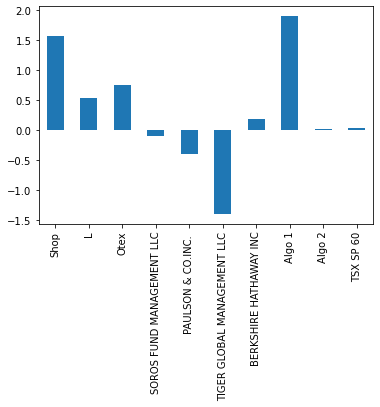

In [239]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind= 'bar')

### How does your portfolio do?

Write your answer here!

In [257]:
##My portfolio does a great job of providing data which will give an excellent insight onto what stocks to buy